THIS WILL BE A CNN ARCHETECTURE FOR THE KERAS DATASET "CIFAR10"


In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


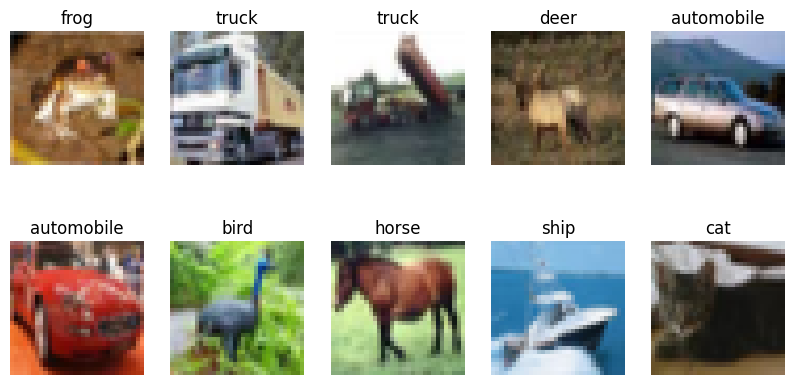

In [6]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig,axe= plt.subplots(2,5,figsize=(10,5))

for i, ax in enumerate(axe.flat):
  image, label = x_train[i], y_train[i]
  ax.imshow(image , cmap='gray')
  ax.set_title(f"{class_labels[label.item()]}")
  ax.axis('off')

plt.show()

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [12]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 68s 44ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.9079 - val_accuracy: 0.7089
Epoch 2/15
1563/1563 [==============================] - 74s 47ms/step - loss: 0.5414 - accuracy: 0.8090 - val_loss: 0.8952 - val_accuracy: 0.7045
Epoch 3/15
1563/1563 [==============================] - 77s 49ms/step - loss: 0.5094 - accuracy: 0.8194 - val_loss: 0.9185 - val_accuracy: 0.7065
Epoch 4/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.4786 - accuracy: 0.8304 - val_loss: 0.9487 - val_accuracy: 0.7087
Epoch 5/15
1563/1563 [==============================] - 75s 48ms/step - loss: 0.4509 - accuracy: 0.8399 - val_loss: 0.9521 - val_accuracy: 0.7169
Epoch 6/15
1563/1563 [==============================] - 78s 50ms/step - loss: 0.4233 - accuracy: 0.8480 - val_loss: 0.9975 - val_accuracy: 0.7065
Epoch 7/15
1563/1563 [==============================] - 82s 52ms/step - loss: 0.3980 - accuracy: 0.8586 - val_loss: 1.0388 -

In [19]:
loss ,accuracy = model.evaluate(x_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 1.4653 - accuracy: 0.6935
Loss:  1.4653129577636719
Accuracy:  0.6934999823570251


In [20]:
pred= model.predict(x_test)

313/313 [==============================] - 4s 13ms/step


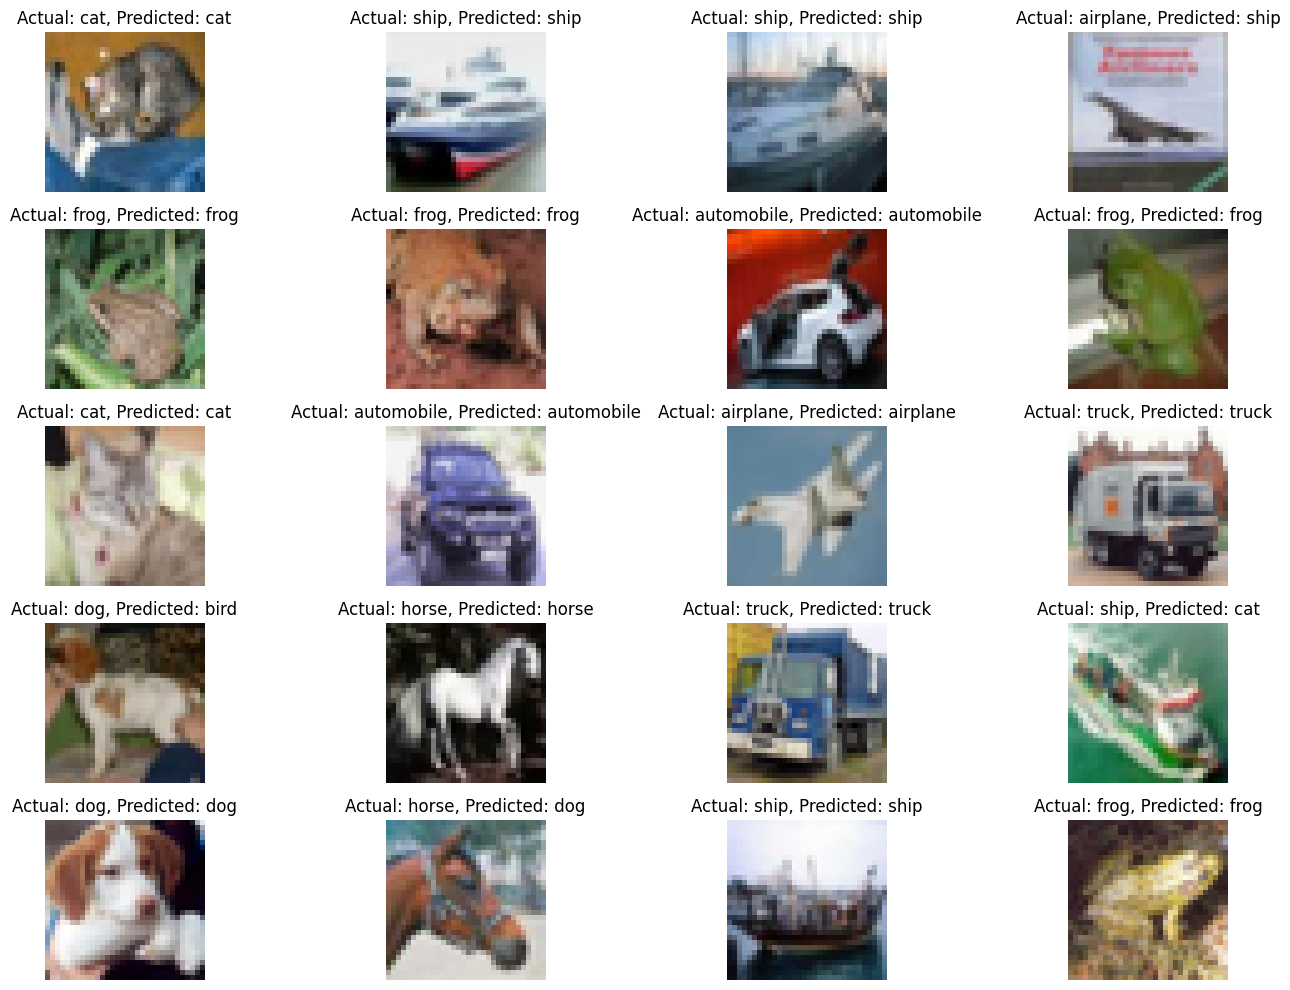

In [21]:
num_images_to_display=20
num_columns=4

num_rows = (num_images_to_display + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        ax.imshow(x_test[i])
        actual_label = class_labels[np.argmax(y_test[i])]
        predicted_label = class_labels[np.argmax(pred[i])]
        ax.set_title(f"Actual: {actual_label}, Predicted: {predicted_label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()